In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# First we read in the airline passenger
#ileName = "data/international-airline-passengers.csv"
fileName = "data/wolfer-sunspot-numbers-1770-to-1.csv"
#fleName ='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'

# Load the data
df = pd.read_csv(fileName, engine='python', skipfooter=3)


if(fileName=='data/international-airline-passengers.csv'):
    time_column_name = 'Month'
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    time_column_name='Year'
elif(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    time_column_name='Time'
    df = df[['Time', 'Close']].copy()

df[time_column_name]=pd.to_datetime(df[time_column_name], format='%Y-%m-%d')
df.set_index([time_column_name], inplace=True)


if(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    train_data = df['2016-01-01 00:00':'2016-05-01 00:00']
    #train_data = df['2016-04-01 00:00':'2016-05-01 00:00']
    #train_data = df['2016-04-27 00:00':'2016-05-01 00:00']
    test_data = df['2016-05-01 00:15':'2016-06-30 23:45']
    
    time_vals = df[train_data.index[0]:test_data.index[len(test_data)-1]]
    train_data = train_data.values.astype('float32')
    test_data = test_data.values.astype('float32')
    number_of_epochs=10
    
    # Extract the raw data, without the dates
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    time_vals = df[df.index[0]:df.index[len(df)-1]]
    data = df.values
    data = data.astype('float32')
    
    # Now we split the data and apply the data scalar
    split = 71
    train_data =  data[0:split,:]
    test_data = data[split:,:]
    number_of_epochs=300
    
    
elif('data/international-airline-passengers.csv'):
    time_vals = df[df.index[0]:df.index[len(df)-1]]
    data = df.values
    data = data.astype('float32')
    
    # Now we split the data and apply the data scalar
    split = 73
    train_data =  data[0:split,:]
    test_data = data[split:,:]
    number_of_epochs=300
print("train data", train_data.shape)

def future_data(data,lags=1,future=1):
    X, y = [], []
    for row in range(len(data) - lags - future):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags+future-1, 0])
    return np.array(X), np.array(y)

def scale_array(y_vec):
    
    ymax = np.max(y_vec)
    ymin = np.min(y_vec)
    
    print("ymax",ymax)
    print("ymin",ymin)
    
    y_vec_scaled = np.zeros((len(y_vec),1))
    
    for k in range(0,len(y_vec)):
        y_vec_scaled[k][0] = (y_vec[k][0]-ymin)/(ymax-ymin)
    
    return y_vec_scaled,ymin,ymax

def invert_scaling(y_vec_scaled,ymin,ymax):
    
    y_vec = np.zeros(y_vec_scaled.shape)
        
        
    for k in range(0,len(y_vec_scaled)):
        y_vec[k] = ymin+(ymax-ymin)*y_vec_scaled[k]
    
    return y_vec

# Process the train and test data
train_data,train_min,train_max = scale_array(train_data)
test_data,test_min,test_max = scale_array(test_data)

lags=1
future=1

# Process the training data
X_train, y_train = future_data(train_data, lags,future)
X_test, y_test = future_data(test_data, lags,future)


# Reshape the arrays
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

train data (71, 1)
ymax 154.0
ymin 0.0
ymax 125.0
ymin 4.0


In [3]:
model = Sequential()
model.add(LSTM(4, input_dim=lags))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=2, verbose=1)

/home/javier/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  from ipykernel import kernelapp as app
/home/javier/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  from ipykernel import kernelapp as app


Epoch 1/300
69/69 [==============================] - 1s 20ms/step - loss: 0.0929
Epoch 2/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0719
Epoch 3/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 4/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 5/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0417
Epoch 6/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 7/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0368
Epoch 8/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 9/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0341
Epoch 10/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 11/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 12/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 13/300
69/69 [================

69/69 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 103/300
69/69 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 104/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 105/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 106/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 107/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 108/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 109/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 110/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 111/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 112/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 113/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 114/300
69/69 [=========

69/69 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 203/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 204/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 205/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 206/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 207/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 208/300
69/69 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 209/300
69/69 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 210/300
69/69 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 211/300
69/69 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 212/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 213/300
69/69 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 214/300
69/69 [=========

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss'])


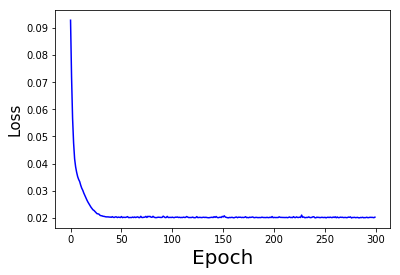

In [4]:
print(history.history.keys())


if(fileName=='data/international-airline-passengers.csv'):
    loss_label = 'Loss_airline_LSTM.pdf'
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    loss_label = 'Loss_sunspot_LSTM.pdf'
elif(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    loss_label = 'Loss_EURUSD_LSTM.pdf'

plt.plot()
plt.plot(history.history['loss'],color='b')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=20)
plt.savefig(loss_label,bboxes='tight')
plt.show()

(27, 1)
Estimated Sigma:  0.0686539179749 0.0840018289281


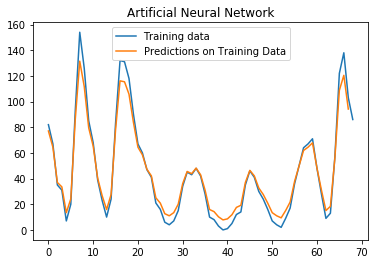

(27, 1)
(1000, 27, 1)
-------------------------------------
MSE:  119.392504984
RMSE:  10.9266877408
-------------------------------------


In [5]:
# generate predictions for training
uncertainty_samples = 1000

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print(test_predict.shape)

residuals = np.abs(y_test.reshape(-1, 1) - test_predict.reshape(-1, 1))

# Here we estimate the average residual 
sigma = 0.5*np.mean(residuals)
std_sigma =  0.5*np.std(residuals)
print("Estimated Sigma: ", sigma, np.std(residuals))


test_predictions = []
for k in range(0,uncertainty_samples):
    test_predict = model.predict(X_test)+np.random.normal(sigma, std_sigma, test_predict.shape)
    test_predictions.append(test_predict)

test_predictions = np.asarray(test_predictions)


# Unscale data
#test_predictions = scaler.inverse_transform(test_predictions)
y_train = invert_scaling(y_train,train_min,train_max)
train_predict = invert_scaling(train_predict,train_min,train_max)

# plot baseline and predictions
plt.plot(y_train, label='Training data');
plt.plot(train_predict[future:], label="Predictions on Training Data")
plt.legend(loc='best');
plt.title('Artificial Neural Network')
plt.show()



y = test_predict.flatten()[future:]

def return_min_max_prediction(test_predictions,i):
    
    y_vec = [ test_predictions[k][i][0] for k in range(0,test_predictions.shape[0])]
    
    ymin = np.min(y_vec)
    ymax = np.max(y_vec)
    
    return ymin,ymax

print(test_predict.shape)
print(test_predictions.shape)


y_min = np.asarray([return_min_max_prediction(test_predictions,i)[0] for i in range(0,len(y))])
y_max = np.asarray([return_min_max_prediction(test_predictions,i)[1] for i in range(0,len(y))])
x = np.arange(-future,len(y_min)-future)


# Unscale all of the data
#print(y_test.shape)
y_test = invert_scaling(y_test,test_min,test_max)
y_min = invert_scaling(y_min,test_min,test_max)
y_max = invert_scaling(y_max,test_min,test_max)
y = invert_scaling(y,test_min,test_max)

x_test = range(len(y_train),len(y_train)+len(y_test))
x = range(len(y_train),len(y_train)+len(y))

# Compute the root mean squared error
mse = ((y_test[:-1].reshape(-1, 1) - y.reshape(-1, 1)) ** 2).mean()


print('-------------------------------------')
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
print('-------------------------------------')

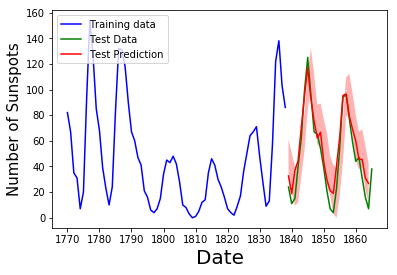

In [6]:
if(fileName=='data/international-airline-passengers.csv'):
    time_steps = 15
    time_format= "%Y"
    y_label = 'Number of Airline Passengers'
    output_name = 'Airline_Passengers_LSTN.pdf'
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    time_steps = 10
    time_format= "%Y"
    y_label = 'Number of Sunspots'
    output_name = 'Sunspot_Forecast_LSTN.pdf'
elif(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    time_format= "%m-%H:%M"
    time_steps = 2800
    y_label = 'Exchange Rate EUR/USD'
    output_name = 'EURO_USD_exchange_rate_LSTN.pdf'


vals= range(0,len(y_train)+len(y_test),time_steps)
labels = [time_vals.index[k].strftime(time_format) for k in vals]


plt.xticks(vals, labels)
plt.ylabel(y_label,fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.plot(y_train, label='Training data',color='b');
plt.plot(x_test,y_test.reshape(-1, 1), label='Test Data', color='g')
plt.plot(x,y, label='Test Prediction', color='red')
plt.fill_between(x, y_min, y_max, facecolor='red', interpolate=True,alpha=0.3)
plt.legend(loc=2)
plt.savefig(output_name,bboxes='tight')
plt.show()